In [88]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
%autoreload 2

In [90]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt 
import os
from tqdm import tqdm
import numpy as np

import sys
import argparse
import neurokit2 as nk
import json
import scipy
from datetime import datetime

import random

In [63]:
# Initialize a variable with the current directory
directory = os.getcwd()

# Create a list to store the directory names
directories = [directory]

# Navigate up the directory tree and store names in the list
while True:
    directory, tail = os.path.split(directory)
    if not tail:
        break
    directories.append(directory)

# Get directories we want
current_directory = directories[0]
dev_directory = directories[2]

# Set the path to the database directory with hdf5 files
shared_dir = directories[-3]
database = 'Database - ECG'
db_directory = os.path.join(shared_dir, database)

# Set the path to the data directory destination (where to save the extracted files)
data_subdirectory = 'input\\ECG_db_new'
data_directory = os.path.join(dev_directory, data_subdirectory)

# Print the directories neatly
print("Current Directory:", current_directory)
print("Dev Directory:", dev_directory)
print("Database Directory", db_directory)
print("Destination Data Directory", data_directory)

Current Directory: x:\GDrive\Shared drives\Project - NeRF ILR to ECG\dev\notebooks\modeling\ConvexECG
Dev Directory: x:\GDrive\Shared drives\Project - NeRF ILR to ECG\dev\notebooks
Database Directory x:\GDrive\Shared drives\Database - ECG
Destination Data Directory x:\GDrive\Shared drives\Project - NeRF ILR to ECG\dev\notebooks\input\ECG_db_new


In [64]:
ppg_path = "X:\ppg_exports_2024\metadata_cleaned.csv"
ppg_df = pd.read_csv(ppg_path)

In [65]:
import pandas as pd
import os

# Drop the unnecessary column if it exists
ppg_df = ppg_df.drop(columns=['Unnamed: 15'], errors='ignore')

# Classify filenames based on their pattern
def classify_filename(filename):
    if isinstance(filename, str):
        if filename.startswith('afib'):
            return 'afib'
        elif filename.startswith('irregular'):
            return 'irregular'
        elif filename.startswith('regular'):
            return 'regular'
        else:
            return 'unclassified'
    return 'unclassified'

# Create a new column for classification
ppg_df['filename_type'] = ppg_df['filename'].apply(classify_filename)

# Count the occurrences of each filename type from the dataframe
filename_counts = ppg_df['filename_type'].value_counts()

# Check total rows in dataframe
print(f"Total rows in dataframe: {len(ppg_df)}")

# Check number of files in directories
folders = ['afib', 'irregular', 'regular', 'unclassified']
base_path = r"X:\\ppg_exports_2024"
folder_counts = {}

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.exists(folder_path):
        folder_counts[folder] = len([f for f in os.listdir(folder_path) if f.endswith('.csv')])
    else:
        folder_counts[folder] = 0

print("\nFile Counts from Directories:")
for folder, count in folder_counts.items():
    print(f"{folder.capitalize()} folder: {count} files")

print("\nFilename Type Counts from DataFrame:")
print(filename_counts)

# Compare results
print("\nComparison of Directory vs DataFrame Counts:")
for folder in folders:
    dir_count = folder_counts.get(folder, 0)
    df_count = filename_counts.get(folder, 0)
    print(f"{folder.capitalize()}: Directory = {dir_count}, DataFrame = {df_count}")

Total rows in dataframe: 2972

File Counts from Directories:
Afib folder: 1053 files
Irregular folder: 968 files
Regular folder: 997 files
Unclassified folder: 99 files

Filename Type Counts from DataFrame:
filename_type
afib         1053
regular       967
irregular     952
Name: count, dtype: int64

Comparison of Directory vs DataFrame Counts:
Afib: Directory = 1053, DataFrame = 1053
Irregular: Directory = 968, DataFrame = 952
Regular: Directory = 997, DataFrame = 967
Unclassified: Directory = 99, DataFrame = 0


In [66]:
import pandas as pd
import os

# Drop the unnecessary column if it exists
ppg_df = ppg_df.drop(columns=['Unnamed: 15'], errors='ignore')

# Classify filenames based on their pattern
def classify_filename(filename):
    if isinstance(filename, str):
        if filename.startswith('afib'):
            return 'afib'
        elif filename.startswith('irregular'):
            return 'irregular'
        elif filename.startswith('regular'):
            return 'regular'
        else:
            return 'unclassified'
    return 'unclassified'

# Create a new column for classification
ppg_df['filename_type'] = ppg_df['filename'].apply(classify_filename)

# Collect all directory filenames
base_path = r"X:\\ppg_exports_2024"
all_directory_files = set()
folders = ['afib', 'irregular', 'regular', 'unclassified']
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    if os.path.exists(folder_path):
        all_directory_files.update(f for f in os.listdir(folder_path) if f.endswith('.csv'))

# Filter dataframe to remove rows without matching files and unclassified types
ppg_df = ppg_df[(ppg_df['filename'].isin(all_directory_files)) & (ppg_df['filename_type'] != 'unclassified')]

# Display results after filtering
print(f"Filtered dataframe row count: {len(ppg_df)}")
print("Filename type counts after filtering:")
print(ppg_df['filename_type'].value_counts())

Filtered dataframe row count: 2972
Filename type counts after filtering:
filename_type
afib         1053
regular       967
irregular     952
Name: count, dtype: int64


In [67]:
ppg_df.head()

,sinus,bradycardia,tachycardia,brady_episode,increased_hrv,tachy_episode,atrial_flutter,atrial_fibrillation,extrasystoles_bigminy,extrasystoles_frequent,extrasystoles_isolated,extrasystoles_trigeminy,extrasystoles_big_episode,extrasystoles_trig_episode,filename,filename_type
0,0.792743,0.010405,0.012852,0.009979,0.046365,0.013038,0.012176,0.011995,0.011067,0.009181,0.037293,0.011029,0.010773,0.011105,regular_1.csv,regular
1,0.302839,0.009541,0.012640,0.010040,0.545251,0.012761,0.008074,0.006429,0.008243,0.010104,0.048075,0.008127,0.009295,0.008582,regular_2.csv,regular
2,0.569893,0.012372,0.013917,0.013252,0.228312,0.015489,0.010631,0.012475,0.011948,0.013415,0.062736,0.011165,0.012777,0.011620,regular_3.csv,regular
3,0.825582,0.010987,0.013214,0.012482,0.012836,0.011228,0.013625,0.010001,0.013409,0.010215,0.028495,0.013385,0.011172,0.013370,regular_4.csv,regular
4,0.442336,0.006235,0.007689,0.023287,0.271213,0.107267,0.006277,0.011201,0.005997,0.011480,0.082505,0.008485,0.008647,0.007381,regular_5.csv,regular


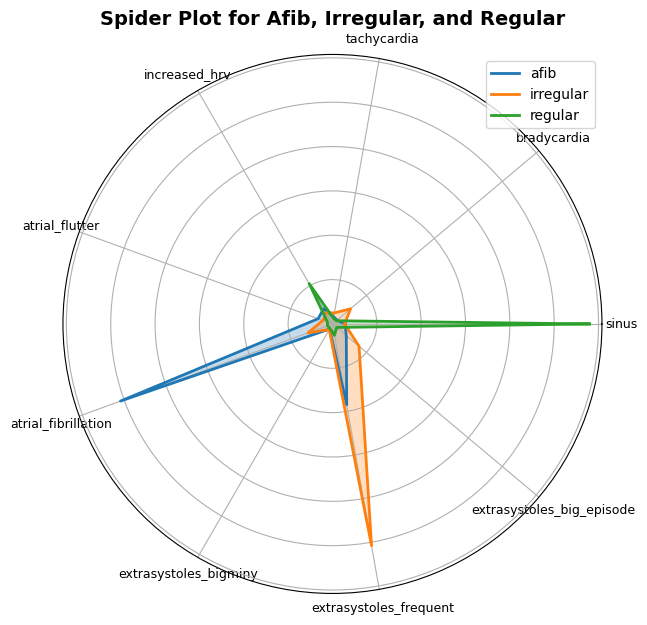

Minimum atrial_fibrillation threshold for Afib classification: 0.005545323


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Selected features for spider plot
features = [
    'sinus', 'bradycardia', 'tachycardia', 'increased_hrv',
    'atrial_flutter', 'atrial_fibrillation',
    'extrasystoles_bigminy', 'extrasystoles_frequent', 'extrasystoles_big_episode'
]

# Calculate mean values for each group (afib, irregular, regular)
mean_values = ppg_df.groupby('filename_type')[features].mean()

# Spider plot function
def plot_spider(data, title):
    labels = np.array(features)
    angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
    angles += angles[:1]
    
    plt.figure(figsize=(7, 7))
    ax = plt.subplot(111, polar=True)
    
    for group, values in data.iterrows():
        stats = values.tolist()
        stats += stats[:1]
        ax.plot(angles, stats, label=group, linewidth=2)
        ax.fill(angles, stats, alpha=0.25)
    
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(loc='upper right')
    plt.show()

# Plot spider charts for afib, irregular, and regular
afib_irregular_regular = mean_values.loc[['afib', 'irregular', 'regular']]
plot_spider(afib_irregular_regular, 'Spider Plot for Afib, Irregular, and Regular')

# Determine the minimum threshold for atrial_fibrillation in afib rows
afib_min_threshold = ppg_df.loc[ppg_df['filename_type'] == 'afib', 'atrial_fibrillation'].min()
print(f"Minimum atrial_fibrillation threshold for Afib classification: {afib_min_threshold}")

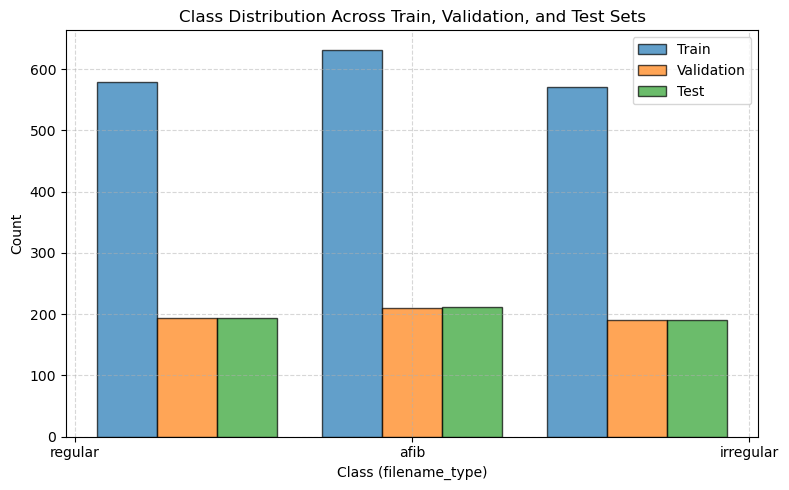

Train Class Distribution:
filename_type
afib         632
regular      580
irregular    571
Name: count, dtype: int64

Validation Class Distribution:
filename_type
afib         210
regular      193
irregular    191
Name: count, dtype: int64

Test Class Distribution:
filename_type
afib         211
regular      194
irregular    190
Name: count, dtype: int64


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Train-test-val split for the three classes from ppg_df
train_df, temp_df = train_test_split(ppg_df, test_size=0.4, stratify=ppg_df['filename_type'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['filename_type'], random_state=42)

# Plot class distribution histogram
plt.figure(figsize=(8, 5))
plt.hist([train_df['filename_type'], val_df['filename_type'], test_df['filename_type']], 
         label=['Train', 'Validation', 'Test'], alpha=0.7, bins=3, edgecolor='black')

plt.xlabel('Class (filename_type)')
plt.ylabel('Count')
plt.title('Class Distribution Across Train, Validation, and Test Sets')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Display counts for reference
print("Train Class Distribution:")
print(train_df['filename_type'].value_counts())
print("\nValidation Class Distribution:")
print(val_df['filename_type'].value_counts())
print("\nTest Class Distribution:")
print(test_df['filename_type'].value_counts())


In [70]:
# import pandas as pd
# import numpy as np
# import os
# import neurokit2 as nk
# from scipy.stats import zscore
# from sklearn.model_selection import train_test_split
# from tqdm import tqdm

# # First split the dataframe into train/val/test 
# train_df, temp_df = train_test_split(ppg_df, test_size=0.4, stratify=ppg_df['filename_type'], random_state=42)
# val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['filename_type'], random_state=42)

# def process_single_file(filename, file_type, root_folder):
#     try:
#         # Load and process file
#         file_path = os.path.join(root_folder, file_type, filename)
#         df = pd.read_csv(file_path).iloc[:1500]
#         df['green'] = zscore(df['green'])
        
#         # Process with Neurokit and convert to numpy
#         signals, _ = nk.ppg_process(df['green'], sampling_rate=25)
#         return signals['PPG_Clean'].to_numpy()
#     except Exception as e:
#         print(f"Error processing {filename}: {e}")
#         return None

# # Process files and create X, y for each set
# def create_dataset(df, root_folder, desc):
#     X = []
#     y = []
    
#     for idx, row in tqdm(df.iterrows(), total=len(df), desc=desc):
#         signal = process_single_file(row['filename'], row['filename_type'], root_folder)
#         if signal is not None:
#             X.append(signal)
#             # Binary classification: regular vs non-regular
#             y.append(0 if row['filename_type'] == 'regular' else 1)
    
#     return np.array(X), np.array(y)

# # Create datasets
# root_folder = r"X:\\ppg_exports_2024"
# X_train, y_train = create_dataset(train_df, root_folder, "Processing training set") 
# X_val, y_val = create_dataset(val_df, root_folder, "Processing validation set") 
# X_test, y_test = create_dataset(test_df, root_folder, "Processing test set") 

# print(f"Training set shape: {X_train.shape}, {y_train.shape}")
# print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
# print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# # Print class distribution
# print("\nClass distribution:")
# print("Training set:", np.bincount(y_train), "(0=regular, 1=non-regular)")
# print("Validation set:", np.bincount(y_val), "(0=regular, 1=non-regular)")
# print("Test set:", np.bincount(y_test), "(0=regular, 1=non-regular)")

# # Print unique filename types to verify our classification
# print("\nUnique filename types in dataset:")
# print(ppg_df['filename_type'].unique())

# # Save datasets to 'X:\\ppg_exports_2024\\fixed_data'
# save_folder = r"X:\\ppg_exports_2024\\fixed_data"
# os.makedirs(save_folder, exist_ok=True)

# np.save(os.path.join(save_folder, 'X_train.npy'), X_train)
# np.save(os.path.join(save_folder, 'y_train.npy'), y_train)
# np.save(os.path.join(save_folder, 'X_val.npy'), X_val)
# np.save(os.path.join(save_folder, 'y_val.npy'), y_val)
# np.save(os.path.join(save_folder, 'X_test.npy'), X_test)
# np.save(os.path.join(save_folder, 'y_test.npy'), y_test)
# print("Datasets saved to 'X:\\ppg_exports_2024\\fixed_data'")

In [71]:
save_folder = r"X:\\ppg_exports_2024\\fixed_data"

# Code cell to load the saved datasets back into the same variable names
X_train = np.load(os.path.join(save_folder, 'X_train.npy'))
y_train = np.load(os.path.join(save_folder, 'y_train.npy'))
X_val = np.load(os.path.join(save_folder, 'X_val.npy'))
y_val = np.load(os.path.join(save_folder, 'y_val.npy'))
X_test = np.load(os.path.join(save_folder, 'X_test.npy'))
y_test = np.load(os.path.join(save_folder, 'y_test.npy'))
print("Datasets loaded from 'X:\\ppg_exports_2024\\fixed_data'")


Datasets loaded from 'X:\ppg_exports_2024\fixed_data'


In [72]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import seaborn as sns

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train SVM with more verbose output and different parameters
svm = SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')

print("Fitting SVM...")
svm.fit(X_train_scaled, y_train)

# Get predictions for all sets
train_pred = svm.predict(X_train_scaled)
val_pred = svm.predict(X_val_scaled)
test_pred = svm.predict(X_test_scaled)

# Print predictions distribution for each set
print("\nPrediction distributions:")
print("Train:", np.bincount(train_pred), f"({len(train_pred)} total)")
print("Val:", np.bincount(val_pred), f"({len(val_pred)} total)")
print("Test:", np.bincount(test_pred), f"({len(test_pred)} total)")

# Look at probabilities to see if they're all similar
train_probs = svm.predict_proba(X_train_scaled)[:, 1]
print("\nProbability statistics for class 1:")
print("Min prob:", train_probs.min())
print("Max prob:", train_probs.max())
print("Mean prob:", train_probs.mean())
print("Sample of probabilities:", train_probs[:10])

# Print detailed performance
print("\nTraining set performance:")
print(classification_report(y_train, train_pred))

Fitting SVM...

Prediction distributions:
Train: [ 583 1200] (1783 total)
Val: [152 442] (594 total)
Test: [148 447] (595 total)

Probability statistics for class 1:
Min prob: 0.6222592071442015
Max prob: 0.7302800085036002
Mean prob: 0.6748751203108463
Sample of probabilities: [0.62807076 0.67558151 0.67889488 0.66968993 0.70398235 0.69912257
 0.66663358 0.68197259 0.69645006 0.62803755]

Training set performance:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       580
           1       0.92      0.92      0.92      1203

    accuracy                           0.90      1783
   macro avg       0.88      0.88      0.88      1783
weighted avg       0.90      0.90      0.90      1783



Test set performance:
              precision    recall  f1-score   support

           0       0.43      0.33      0.37       194
           1       0.71      0.79      0.75       401

    accuracy                           0.64       595
   macro avg       0.57      0.56      0.56       595
weighted avg       0.62      0.64      0.63       595



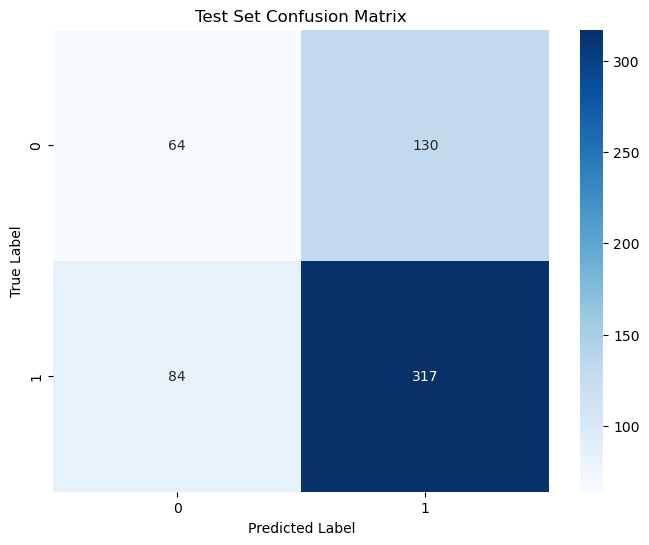

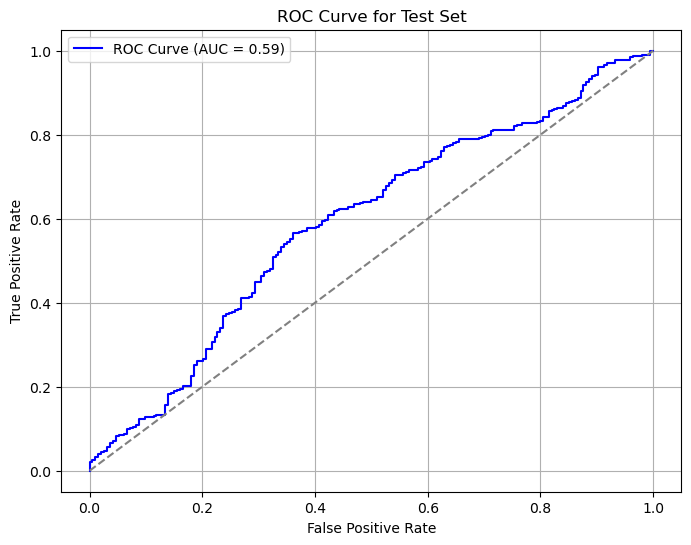


Probability statistics for test set:
Min prob: 0.6229677889844035
Max prob: 0.7246285915056306
Mean prob: 0.6740854841500188


In [73]:
# Get test set predictions and performance
test_pred = svm.predict(X_test_scaled)
test_probs = svm.predict_proba(X_test_scaled)[:, 1]

# Print detailed test performance
print("Test set performance:")
print(classification_report(y_test, test_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, test_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend()
plt.grid(True)
plt.show()

print("\nProbability statistics for test set:")
print("Min prob:", test_probs.min())
print("Max prob:", test_probs.max())
print("Mean prob:", test_probs.mean())

In [74]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
import torch.cuda.amp as amp


# --- Data Preparation ---
# Reshape X data to have an extra dimension for the feature channel
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # shape: (samples, 1500, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)                 # y_train is already numpy
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)    # shape: (samples, 1500, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)                  # y_test is already numpy

# Also should include validation set
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(-1)      # shape: (samples, 1500, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

class CNN1DClassifier(nn.Module):
    def __init__(self, in_channels=1, dropout=0.1):
        super(CNN1DClassifier, self).__init__()
        
        # Example: two convolutional layers
        self.conv1 = nn.Conv1d(in_channels, 16, kernel_size=5, stride=1, padding=2)
        self.bn1 = nn.BatchNorm1d(16)
        
        self.conv2 = nn.Conv1d(16, 32, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm1d(32)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        
        # AdaptiveMaxPool1d(1) squeezes the time dimension down to 1,
        # so the output shape will be [batch_size, 32].
        self.pool = nn.AdaptiveMaxPool1d(output_size=1)
        
        # Final fully connected layer to get a single logit
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        """
        x is assumed to be of shape [batch_size, seq_len, 1].
        We permute to [batch_size, 1, seq_len] for Conv1d.
        """
        x = x.permute(0, 2, 1)  # -> [batch_size, 1, 1500]
        
        # Convolution block 1
        x = self.conv1(x)       # -> [batch_size, 16, 1500]
        x = self.bn1(x)
        x = self.relu(x)
        
        # Convolution block 2
        x = self.conv2(x)       # -> [batch_size, 32, 1500]
        x = self.bn2(x)
        x = self.relu(x)
        
        # Global max pooling to reduce the time dimension
        x = self.pool(x)        # -> [batch_size, 32, 1]
        x = x.view(x.size(0), -1)  # -> [batch_size, 32]
        
        x = self.dropout(x)
        out = self.fc(x)        # -> [batch_size, 1]

        # Return a single logit per sample (no sigmoid, since we'll use BCEWithLogitsLoss)
        return out.squeeze()


# --- Model, Optimizer, and Loss Function ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN1DClassifier().to(device)
criterion = nn.BCEWithLogitsLoss()  # Changed from BCELoss to BCEWithLogitsLoss
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)
scaler = amp.GradScaler()


# --- Training Loop ---
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        
        # Wrap training step in autocast
        with amp.autocast():
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
        
        # Scale the loss and call backward
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        epoch_loss += loss.item() * X_batch.size(0)
    
    epoch_loss /= len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

# --- Evaluation ---
model.eval()
y_pred = []
y_true = []
y_proba = []

with torch.no_grad(), amp.autocast():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        probs = torch.sigmoid(outputs)  # Add sigmoid here for probabilities
        y_proba.extend(probs.cpu().numpy())
        y_pred.extend((probs.cpu().numpy() > 0.5).astype(int))
        y_true.extend(y_batch.cpu().numpy())

Epoch 1/20, Loss: 0.7435
Epoch 2/20, Loss: 0.5262
Epoch 3/20, Loss: 0.5381
Epoch 4/20, Loss: 0.5287
Epoch 5/20, Loss: 0.5040
Epoch 6/20, Loss: 0.4859
Epoch 7/20, Loss: 0.4927
Epoch 8/20, Loss: 0.4672
Epoch 9/20, Loss: 0.4813
Epoch 10/20, Loss: 0.4735
Epoch 11/20, Loss: 0.4714
Epoch 12/20, Loss: 0.5067
Epoch 13/20, Loss: 0.4827
Epoch 14/20, Loss: 0.4787
Epoch 15/20, Loss: 0.4596
Epoch 16/20, Loss: 0.4641
Epoch 17/20, Loss: 0.4629
Epoch 18/20, Loss: 0.4662
Epoch 19/20, Loss: 0.4592
Epoch 20/20, Loss: 0.4542


In [75]:
print(model)
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of trainable parameters:", num_params)


CNN1DClassifier(
  (conv1): Conv1d(1, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(16, 32, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (pool): AdaptiveMaxPool1d(output_size=1)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
Number of trainable parameters: 2817


Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.45      0.56       194
         1.0       0.78      0.93      0.85       401

    accuracy                           0.77       595
   macro avg       0.77      0.69      0.71       595
weighted avg       0.77      0.77      0.76       595



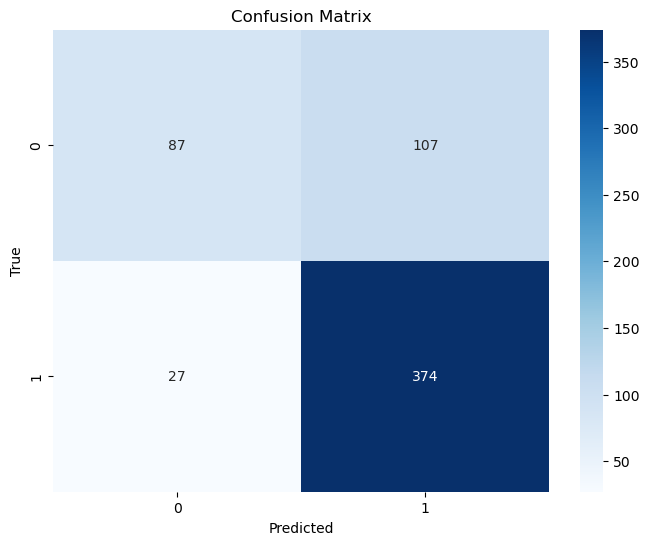

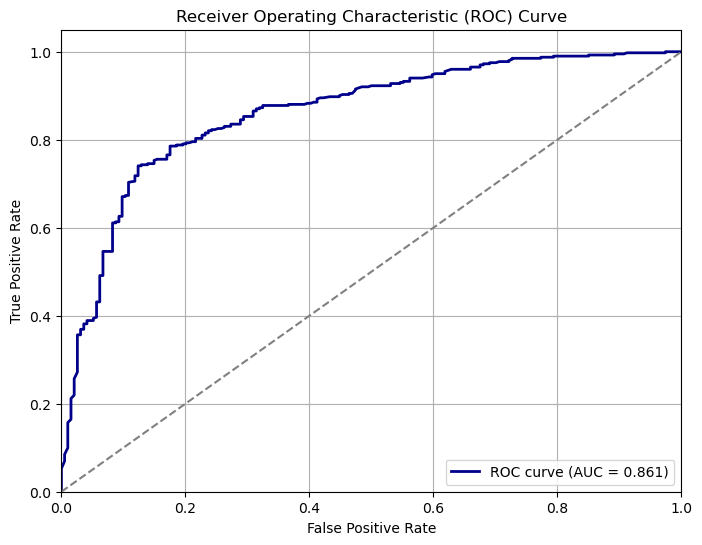


Detailed Metrics:
Accuracy: 0.775
Precision: 0.778
Recall: 0.933
F1 Score: 0.848
ROC AUC: 0.861


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print additional metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\nDetailed Metrics:")
print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
print(f"Precision: {precision_score(y_true, y_pred):.3f}")
print(f"Recall: {recall_score(y_true, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_true, y_pred):.3f}")
print(f"ROC AUC: {roc_auc:.3f}")

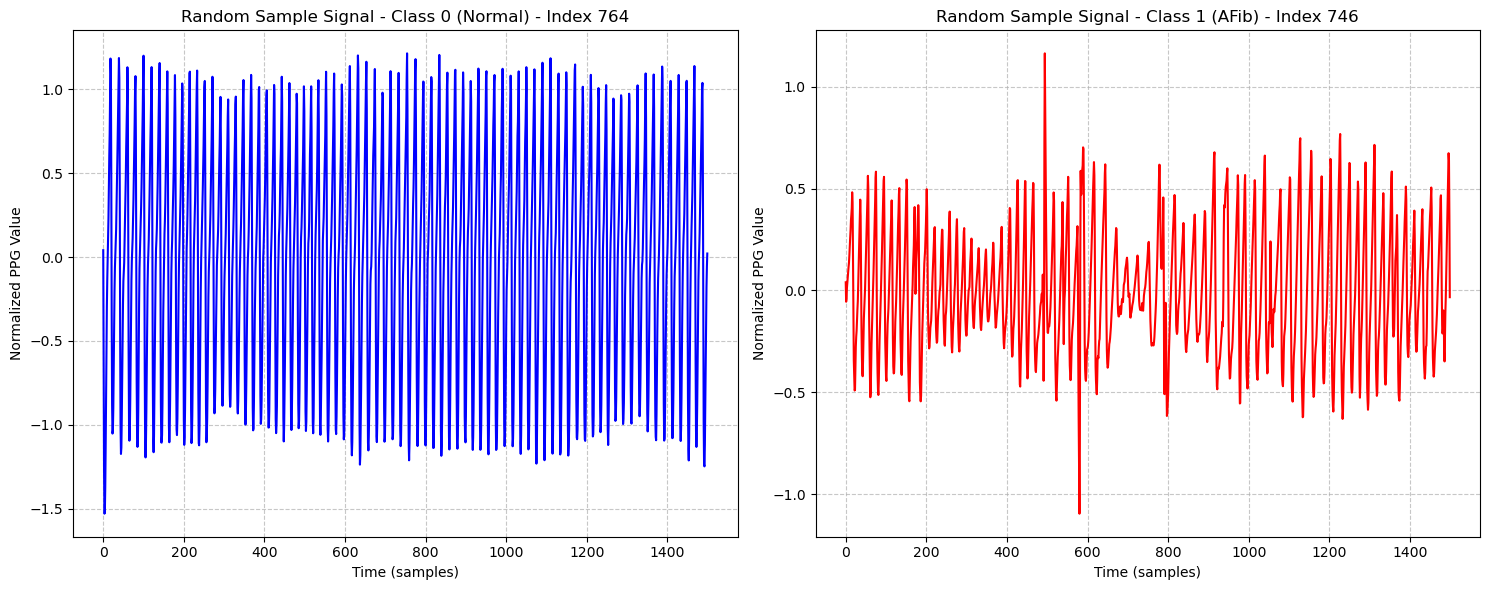

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

# Ensure compatibility with the new data preparation (samples, 1500, 1)
if X_train_tensor.dim() != 3 or X_train_tensor.shape[-1] != 1:
    raise ValueError("X_train_tensor must have shape (samples, 1500, 1) for compatibility with the LSTM.")

# Randomly select examples from each class
class_0_indices = (y_train_tensor == 0).nonzero(as_tuple=True)[0]
class_1_indices = (y_train_tensor == 1).nonzero(as_tuple=True)[0]

if len(class_0_indices) == 0 or len(class_1_indices) == 0:
    raise ValueError("Both classes must have at least one sample in the training data.")

idx_0 = random.choice(class_0_indices).item()
idx_1 = random.choice(class_1_indices).item()

# Extract signals and labels
signal_0 = X_train_tensor[idx_0].squeeze().numpy()
signal_1 = X_train_tensor[idx_1].squeeze().numpy()

# Plot the signals side by side
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(signal_0, color='blue')
plt.title(f"Random Sample Signal - Class 0 (Normal) - Index {idx_0}")
plt.xlabel('Time (samples)')
plt.ylabel('Normalized PPG Value')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(signal_1, color='red')
plt.title(f"Random Sample Signal - Class 1 (AFib) - Index {idx_1}")
plt.xlabel('Time (samples)')
plt.ylabel('Normalized PPG Value')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [78]:
import torch 
# Check if PyTorch recognizes the GPU
if torch.cuda.is_available():
    print("\nPyTorch recognizes the GPU!")
    print("Current Device:", torch.cuda.current_device())
    print("Device Count:", torch.cuda.device_count())
    print("Device Name:", torch.cuda.get_device_name(0))
else:
    print("\nPyTorch doesn't recognize any GPU.")

# Print PyTorch and CUDA versions
print("\nPyTorch Version:", torch.__version__)
print("CUDA Version:", torch.version.cuda)


PyTorch recognizes the GPU!
Current Device: 0
Device Count: 1
Device Name: NVIDIA GeForce RTX 4090

PyTorch Version: 2.3.1+cu121
CUDA Version: 12.1


In [79]:
# Find top 5 bradycardia indices
brady_top5 = ppg_df['bradycardia'].sort_values(ascending=False).head(5)
print("Top 5 Bradycardia Indices:")
print(brady_top5.index.tolist())
print("\nBradycardia values:")
print(brady_top5.values.tolist())

# Find top 5 tachycardia indices
tachy_top5 = ppg_df['tachycardia'].sort_values(ascending=False).head(5)
print("\nTop 5 Tachycardia Indices:")
print(tachy_top5.index.tolist())
print("\nTachycardia values:")
print(tachy_top5.values.tolist())

Top 5 Bradycardia Indices:
[1748, 1237, 1778, 1249, 1784]

Bradycardia values:
[0.981911004, 0.980447412, 0.975273907, 0.97465682, 0.971157312]

Top 5 Tachycardia Indices:
[1462, 1387, 1443, 1567, 1126]

Tachycardia values:
[0.950393677, 0.947268903, 0.94004941, 0.939630628, 0.928677678]


In [80]:
import pandas as pd
import os

# Root folder path (Windows compatible)
root_folder = r"X:\\ppg_exports_2024"

# Pick a row from ppg_df and get the filename and type
sample_row = ppg_df.iloc[23]
sample_filename = sample_row['filename']
sample_type = sample_row['filename_type']

# Construct path through the subfolder based on filename type
file_path = os.path.join(root_folder, sample_type, sample_filename)

# Try loading the CSV and display its shape
try:
    sample_df = pd.read_csv(file_path)
    print(f"Loaded file: {file_path}")
    print(f"Shape of the loaded file: {sample_df.shape}")
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"Error loading file: {e}")

Loaded file: X:\\ppg_exports_2024\regular\regular_24.csv
Shape of the loaded file: (1518, 7)


Extracted PPG Features:
   PPG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  \
0     120.833334  496.896552  55.668407         NaN         NaN         NaN   

   HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN         NaN  60.524027  ...    1.871802    3.361257   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD   HRV_HFD   HRV_KFD  \
0     1.605278  0.768944        0.0         0.0  1.402485  1.937146  3.705408   

    HRV_LZC  
0  1.312996  

[1 rows x 83 columns]
Associated Key Features from ppg_df (Row 0):
sinus                        0.046409
bradycardia                  0.004817
tachycardia                  0.005863
increased_hrv                0.728221
atrial_flutter               0.004314
atrial_fibrillation          0.004046
extrasystoles_bigminy        0.004529
extrasystoles_frequent       0.083056
extrasystoles_big_episode    0.004592
Name: 23, dtype: object


c:\Users\Rayan\.conda\envs\ILR\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning:

DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.



<Figure size 1500x600 with 0 Axes>

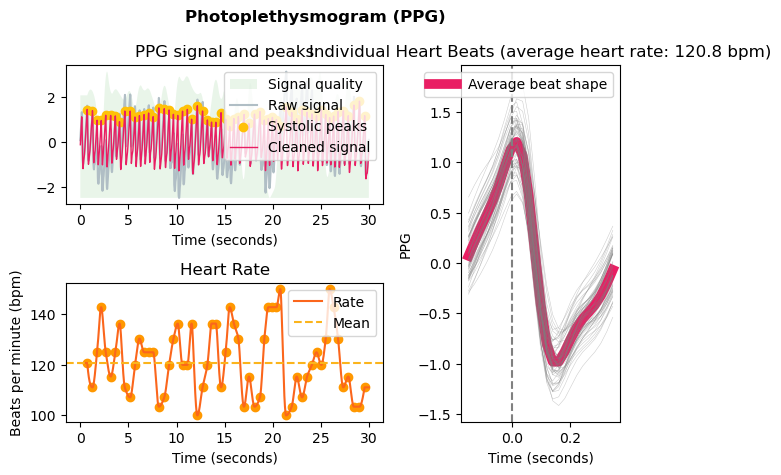

In [81]:
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Set the figure size before plotting
plt.figure(figsize=(15, 6))  # Width: 15 inches, Height: 6 inches

# Trim the signal to 1500 samples (30 seconds at 50 Hz)
sample_df = sample_df.iloc[:1500]

# Z-score normalize the Green PPG signal
sample_df['green'] = zscore(sample_df['green'])

# Process PPG using NeuroKit2
signals, info = nk.ppg_process(sample_df['green'], sampling_rate=50)

# Analyze PPG features
ppg_features = nk.ppg_analyze(signals, sampling_rate=50)
print("Extracted PPG Features:")
print(ppg_features)

# Retrieve associated key features from ppg_df for this signal (row 0)
features = [
    'sinus', 'bradycardia', 'tachycardia', 'increased_hrv',
    'atrial_flutter', 'atrial_fibrillation',
    'extrasystoles_bigminy', 'extrasystoles_frequent', 'extrasystoles_big_episode'
]
associated_features = ppg_df.loc[23, features]
print("Associated Key Features from ppg_df (Row 0):")
print(associated_features)

# Plot PPG signal with extracted features using NeuroKit2
nk.ppg_plot(signals, info)

# Adjust layout to prevent any cutoff
plt.tight_layout()
plt.show()

Loaded file: X:\\ppg_exports_2024\afib\afib_423.csv
Shape of the loaded file: (1518, 7)


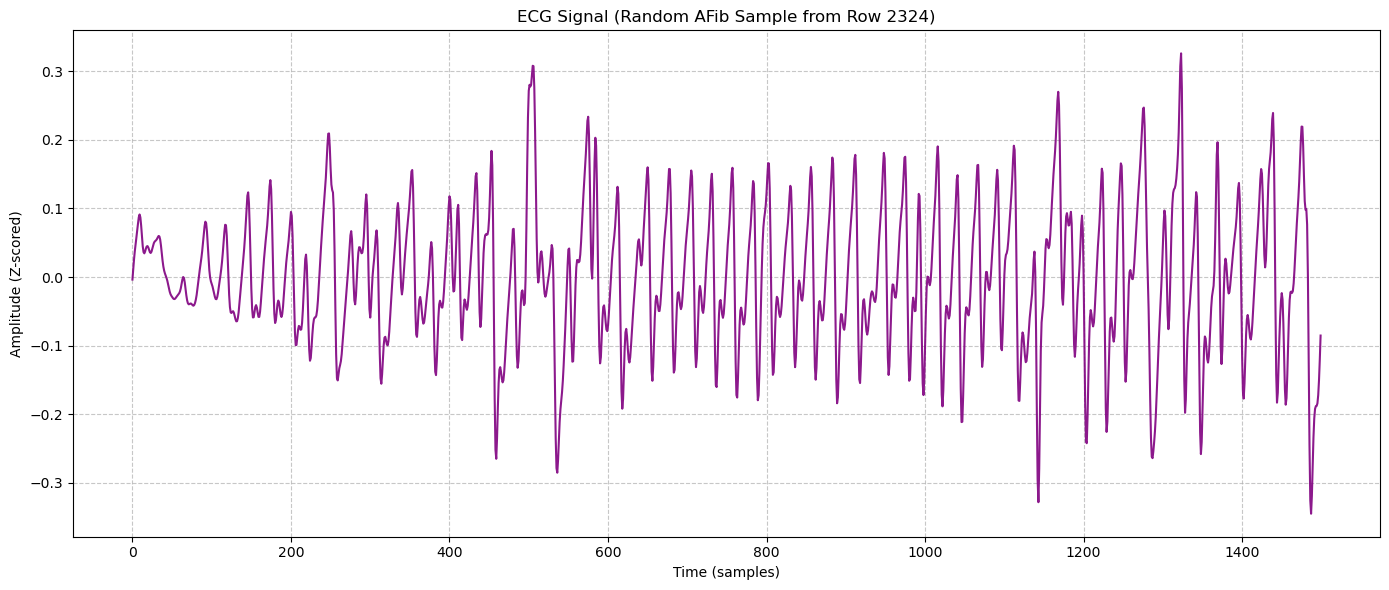

In [82]:
import pandas as pd
import numpy as np
import os
import neurokit2 as nk
import matplotlib.pyplot as plt
from scipy.stats import zscore
import random

# Find a random row with 'atrial_fibrillation' feature in ppg_df
afib_rows = ppg_df[ppg_df['filename_type'] == "afib"]
if afib_rows.empty:
    raise ValueError("No rows with atrial_fibrillation found in ppg_df.")

random_idx = random.choice(afib_rows.index)
sample_row = ppg_df.loc[random_idx]

sample_filename = sample_row['filename']
sample_type = sample_row['filename_type']
file_path = os.path.join(root_folder, sample_type, sample_filename)

# Load the CSV and process it
try:
    sample_df = pd.read_csv(file_path)
    print(f"Loaded file: {file_path}")
    print(f"Shape of the loaded file: {sample_df.shape}")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    raise
except Exception as e:
    print(f"Error loading file: {e}")
    raise

# Trim and Z-score normalize the signal
sample_df = sample_df.iloc[:1500]
sample_df['green'] = zscore(sample_df['green'])

# Process the PPG signal using NeuroKit2
signals, info = nk.ppg_process(sample_df['green'], sampling_rate=50)

# Convert 'PPG_Clean' to a NumPy array
pp_clean = signals['PPG_Clean'].to_numpy()

# Plot the ECG signal elegantly
plt.figure(figsize=(14, 6))
plt.plot(pp_clean, color='purple', linewidth=1.5, alpha=0.9)
plt.title(f'ECG Signal (Random AFib Sample from Row {random_idx})')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (Z-scored)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [83]:
import pandas as pd
import numpy as np

# Save pp_clean as a CSV
pp_clean_df = pd.DataFrame(pp_clean, columns=['PPG_Clean'])
pp_clean_df.to_csv('pp_clean_signal.csv', index=False)
print("pp_clean signal saved as 'pp_clean_signal.csv'")


pp_clean signal saved as 'pp_clean_signal.csv'


In [84]:
import time

# Measure inference time on a single test sample
model.eval()
sample = X_test_tensor[0].unsqueeze(0).to(device)

with torch.no_grad():
    start_time = time.time()
    for _ in range(100):  # Run multiple inferences for more reliable timing
        _ = model(sample)
    end_time = time.time()

average_time = (end_time - start_time) / 100
print(f"Average Inference Time per Sample: {average_time * 1000:.3f} ms")
print(f"Samples per Second: {1 / average_time:.2f}")

Average Inference Time per Sample: 0.274 ms
Samples per Second: 3654.63


In [85]:
input_size_bytes = sample.element_size() * sample.nelement()
input_size_kb = input_size_bytes / 1024
input_size_mb = input_size_kb / 1024

print(f"Input size per PPG sample: {input_size_bytes:.2f} bytes")
print(f"Input size per PPG sample: {input_size_kb:.4f} KB")
print(f"Input size per PPG sample: {input_size_mb:.6f} MB")


Input size per PPG sample: 6000.00 bytes
Input size per PPG sample: 5.8594 KB
Input size per PPG sample: 0.005722 MB


In [86]:
samples_per_sec = 1 / average_time
data_throughput_bytes = input_size_bytes * samples_per_sec
data_throughput_kb = data_throughput_bytes / 1024
data_throughput_mb = data_throughput_kb / 1024

print(f"Throughput: {data_throughput_bytes:.2f} bytes/sec")
print(f"Throughput: {data_throughput_kb:.2f} KB/sec")
print(f"Throughput: {data_throughput_mb:.4f} MB/sec")


Throughput: 21927752.75 bytes/sec
Throughput: 21413.82 KB/sec
Throughput: 20.9119 MB/sec


In [87]:
torch.save(model.state_dict(), "1dcnn_model.pth")
import os
model_size = os.path.getsize("1dcnn_model.pth") / 1024
print(f"Model size on disk: {model_size:.2f} KB")


Model size on disk: 16.80 KB
